In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
kepler_data = pd.read_csv(r"C:\Users\hp\Downloads\kepler_data.csv")


In [3]:
kepler_data

,kepid,kepoi_name,kepler_name,koi_disposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,1.000,0,0,0,0,9.488036,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,0.969,0,0,0,0,54.418383,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,0.000,0,0,0,0,19.899140,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,0.000,0,1,0,0,1.736952,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,1.000,0,0,0,0,2.525592,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,10090151,K07985.01,NaN,FALSE POSITIVE,0.000,0,1,1,0,0.527699,...,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
9560,10128825,K07986.01,NaN,CANDIDATE,0.497,0,0,0,0,1.739849,...,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
9561,10147276,K07987.01,NaN,FALSE POSITIVE,0.021,0,0,1,0,0.681402,...,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385
9562,10155286,K07988.01,NaN,CANDIDATE,0.092,0,0,0,0,333.486169,...,-128.0,2.992,0.030,-0.027,7.824,0.223,-1.896,296.76288,47.145142,10.998


In [4]:
# Drop irrelevant column
kepler_data = kepler_data.drop(columns=['kepler_name','koi_teq_err2','koi_teq_err1'])


In [5]:
kepler_data=kepler_data.dropna()

In [6]:
kepler_data

,kepid,kepoi_name,koi_disposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460,K00752.01,CONFIRMED,1.000,0,0,0,0,9.488036,2.780000e-05,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,CONFIRMED,0.969,0,0,0,0,54.418383,2.480000e-04,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,CANDIDATE,0.000,0,0,0,0,19.899140,1.490000e-05,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,K00754.01,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,K00755.01,CONFIRMED,1.000,0,0,0,0,2.525592,3.760000e-06,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,10090151,K07985.01,FALSE POSITIVE,0.000,0,1,1,0,0.527699,1.160000e-07,...,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
9560,10128825,K07986.01,CANDIDATE,0.497,0,0,0,0,1.739849,1.780000e-05,...,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
9561,10147276,K07987.01,FALSE POSITIVE,0.021,0,0,1,0,0.681402,2.430000e-06,...,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385
9562,10155286,K07988.01,CANDIDATE,0.092,0,0,0,0,333.486169,4.240000e-03,...,-128.0,2.992,0.030,-0.027,7.824,0.223,-1.896,296.76288,47.145142,10.998


In [7]:
# Convert categorical column to numeric
kepler_data['koi_disposition'] = kepler_data['koi_disposition'].astype('category').cat.codes

In [8]:
kepler_data['koi_disposition']

0       1
1       1
2       0
3       2
4       1
       ..
9559    2
9560    0
9561    2
9562    0
9563    2
Name: koi_disposition, Length: 7803, dtype: int8

In [9]:
missing_values = kepler_data.isnull().sum()
missing_values

kepid                0
kepoi_name           0
koi_disposition      0
koi_score            0
koi_fpflag_nt        0
koi_fpflag_ss        0
koi_fpflag_co        0
koi_fpflag_ec        0
koi_period           0
koi_period_err1      0
koi_period_err2      0
koi_time0bk          0
koi_time0bk_err1     0
koi_time0bk_err2     0
koi_impact           0
koi_impact_err1      0
koi_impact_err2      0
koi_duration         0
koi_duration_err1    0
koi_duration_err2    0
koi_depth            0
koi_depth_err1       0
koi_depth_err2       0
koi_prad             0
koi_prad_err1        0
koi_prad_err2        0
koi_teq              0
koi_insol            0
koi_insol_err1       0
koi_insol_err2       0
koi_model_snr        0
koi_tce_plnt_num     0
koi_tce_delivname    0
koi_steff            0
koi_steff_err1       0
koi_steff_err2       0
koi_slogg            0
koi_slogg_err1       0
koi_slogg_err2       0
koi_srad             0
koi_srad_err1        0
koi_srad_err2        0
ra                   0
dec        

In [10]:
# Select relevant columns for training
X = kepler_data.drop(columns=['koi_disposition', 'kepid', 'kepoi_name'])
y = kepler_data['koi_disposition']


In [11]:
X

,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1.000,0,0,0,0,9.488036,2.780000e-05,-2.780000e-05,170.538750,0.002160,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,0.969,0,0,0,0,54.418383,2.480000e-04,-2.480000e-04,162.513840,0.003520,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,0.000,0,0,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,1.000,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,0.000,0,1,1,0,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.000170,...,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
9560,0.497,0,0,0,0,1.739849,1.780000e-05,-1.780000e-05,133.001270,0.007690,...,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
9561,0.021,0,0,1,0,0.681402,2.430000e-06,-2.430000e-06,132.181750,0.002850,...,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385
9562,0.092,0,0,0,0,333.486169,4.240000e-03,-4.240000e-03,153.615010,0.005070,...,-128.0,2.992,0.030,-0.027,7.824,0.223,-1.896,296.76288,47.145142,10.998


In [12]:
X = X.apply(pd.to_numeric, errors='coerce')

In [13]:
X.fillna(0, inplace=True)

In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7803 entries, 0 to 9563
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   koi_score          7803 non-null   float64
 1   koi_fpflag_nt      7803 non-null   float64
 2   koi_fpflag_ss      7803 non-null   int64  
 3   koi_fpflag_co      7803 non-null   int64  
 4   koi_fpflag_ec      7803 non-null   int64  
 5   koi_period         7803 non-null   float64
 6   koi_period_err1    7803 non-null   float64
 7   koi_period_err2    7803 non-null   float64
 8   koi_time0bk        7803 non-null   float64
 9   koi_time0bk_err1   7803 non-null   float64
 10  koi_time0bk_err2   7803 non-null   float64
 11  koi_impact         7803 non-null   float64
 12  koi_impact_err1    7803 non-null   float64
 13  koi_impact_err2    7803 non-null   float64
 14  koi_duration       7803 non-null   float64
 15  koi_duration_err1  7803 non-null   float64
 16  koi_duration_err2  7803 

In [15]:
y 

0       1
1       1
2       0
3       2
4       1
       ..
9559    2
9560    0
9561    2
9562    0
9563    2
Name: koi_disposition, Length: 7803, dtype: int8

In [16]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
X_train

,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
2529,1.000,0.0,0,0,0,22.803025,1.120000e-04,-1.120000e-04,153.375410,0.004140,...,-73.0,4.061,0.030,-0.030,1.613,0.098,-0.074,282.49222,43.980209,11.390
4597,0.000,0.0,1,1,0,1.084699,1.000000e-05,-1.000000e-05,131.737600,0.008480,...,-205.0,4.506,0.052,-0.208,0.938,0.297,-0.099,293.98932,45.484150,15.824
4252,0.665,0.0,0,0,0,101.952048,1.730000e-03,-1.730000e-03,206.349900,0.014700,...,-225.0,4.407,0.087,-0.203,1.054,0.339,-0.121,297.27087,46.928421,13.658
3396,0.957,0.0,0,0,0,16.298220,2.290000e-04,-2.290000e-04,134.740400,0.012600,...,-88.0,4.736,0.030,-0.030,0.521,0.031,-0.031,291.45490,37.677120,14.709
4064,1.000,0.0,0,0,0,6.239684,2.440000e-05,-2.440000e-05,133.721240,0.003070,...,-156.0,4.303,0.180,-0.180,1.143,0.305,-0.222,286.35339,44.961182,13.795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5689,0.000,0.0,1,1,0,0.708805,4.190000e-07,-4.190000e-07,132.168239,0.000505,...,-210.0,4.500,0.052,-0.208,0.908,0.269,-0.090,294.04828,38.364109,15.036
5870,0.000,0.0,1,1,1,75.378782,5.590000e-04,-5.590000e-04,167.107980,0.005260,...,-76.0,4.488,0.088,-0.028,0.841,0.038,-0.066,297.63519,41.641869,12.218
909,1.000,0.0,0,0,0,11.131272,3.510000e-05,-3.510000e-05,134.363410,0.002690,...,-117.0,4.202,0.156,-0.117,1.435,0.247,-0.271,288.13370,38.996880,13.459
9351,0.487,0.0,0,0,0,242.036700,1.620000e-02,-1.620000e-02,181.746000,0.054600,...,-214.0,4.360,0.108,-0.201,1.116,0.340,-0.183,295.22937,45.624889,15.055


In [18]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}


In [19]:
rf = RandomForestClassifier()

In [20]:
# Train the classifier
rf.fit(X_train, y_train)

RandomForestClassifier()

In [21]:

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
print("Starting GridSearchCV...")


Starting GridSearchCV...


In [22]:
# Perform the grid search
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 324 candidates, totalling 972 fits


C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
486 fits failed out of a total of 972.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
357 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\util

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [26]:
# Get the best parameters
best_params = grid_search.best_params_



In [27]:
# Train the model using the best parameters
best_rf = RandomForestClassifier(**best_params)
best_rf.fit(X_train, y_train)


RandomForestClassifier(bootstrap=False, max_depth=20, n_estimators=300)

In [30]:
# Predict on the test set
y_pred = best_rf.predict(X_test)

In [31]:
y_pred

array([1, 2, 2, ..., 2, 0, 2], dtype=int8)

In [32]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8987828315182576


In [33]:
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.71      0.77       367
           1       0.81      0.89      0.85       458
           2       0.98      1.00      0.99       736

    accuracy                           0.90      1561
   macro avg       0.88      0.87      0.87      1561
weighted avg       0.90      0.90      0.90      1561



In [47]:
label_Encoder = LabelEncoder()

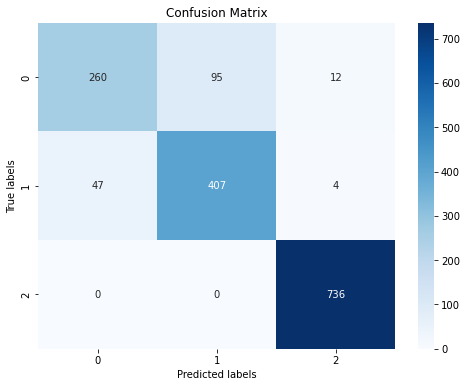

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()